## Problem 1

# a)

We want to obtain log-likelihood function for a random sample of n observations. Our likelihood function looks like this:

\begin{equation*}
L(\alpha, \beta | x ) = \Pi_{i=1}^n f(x_i | \alpha , \beta )
\end{equation*}

Now we logarithmize both sides of likelihood function and perform several computations in order to simplify result:

\begin{equation*}
\ln L(\alpha, \beta | x ) = \sum_{i=1}^n \ln f(x_i | \alpha , \beta ) = 
\sum_{i=1}^n \ln (\alpha \beta x_{i}^{\beta-1}e^{-\alpha x_i^\beta}) = 
\sum_{i=1}^n \Big( \ln(\alpha \beta) + (\beta-1) \ln(x_i)-\alpha x_i^\beta \Big) = 
n \ln (\alpha \beta ) + (\beta - 1) \sum_{i=1}^n \Big(\ln(x_i)\Big) - \alpha \sum_{i=1}^n x_i^\beta
\end{equation*}


Our log-likelihood function for a random sample of n observations:
\begin{equation*}
\ln L(\alpha, \beta | x ) = n \ln (\alpha \beta ) + (\beta - 1) \sum_{i=1}^n (\ln(x_i)) - \alpha \sum_{i=1}^n x_i^\beta
\end{equation*}

# b)

Necessary condition equations for $\alpha$ and $\beta$ can be easily derived by taking first derivatives of the log-likelihood function with respect to $\alpha$ and $\beta$ respectively and setting them to be equal to zero:\
(This makes sense, as we are trying to maximize the log-likelihood function) 


$$
\left[\begin{array}{cc} 
\frac{\partial \ln L}{\partial \alpha} \\
\frac{\partial \ln L}{\partial \beta}
\end{array}\right] =
\left[\begin{array}{cc} 
\frac{n}{\alpha} - \sum_{i=1}^n x_i^\beta \\ 
\frac{n}{\beta} + \sum_{i=1}^n \Big( \ln ( x_i ) \Big) - \alpha \sum_{i=1}^n x_i^\beta \ln(x_i)
\end{array}\right] =
\left[\begin{array}{cc} 
0 \\ 
0
\end{array}\right]
$$


From this we can easily derive that 

$$\alpha = \frac{n}{\sum_{i=1}^n x_i^\beta}$$

# c) 

Hessian matrix of the log-likelihood with respect to $\alpha$ and $\beta$:

$$
H = 
\left[\begin{array}{cc} 
\frac{\partial^2 \ln L}{\partial \alpha^2} & \frac{\partial^2 \ln L}{\partial \alpha \partial \beta}\\
\frac{\partial^2 \ln L}{\partial \alpha \partial \beta} & \frac{\partial^2 \ln L}{\partial \beta^2}
\end{array}\right] =
\left[\begin{array}{cc} 
\frac{-n}{\alpha^2} & - \sum_{i=1}^n x_i^\beta \ln(x_i)\\ 
-\sum_{i=1}^n x_i^\beta \ln(x_i) & \frac{-n}{\beta^2}-\alpha \sum_{i=1}^n x_i^\beta \ln^2(x_i)
\end{array}\right]
$$



We will load our dataset for Problem Set 1:

[1] 7.707593 4.074502 9.548650 9.200836 4.282653 9.198474

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00902   4.44232  10.56822  15.19931  21.05152 154.02744 

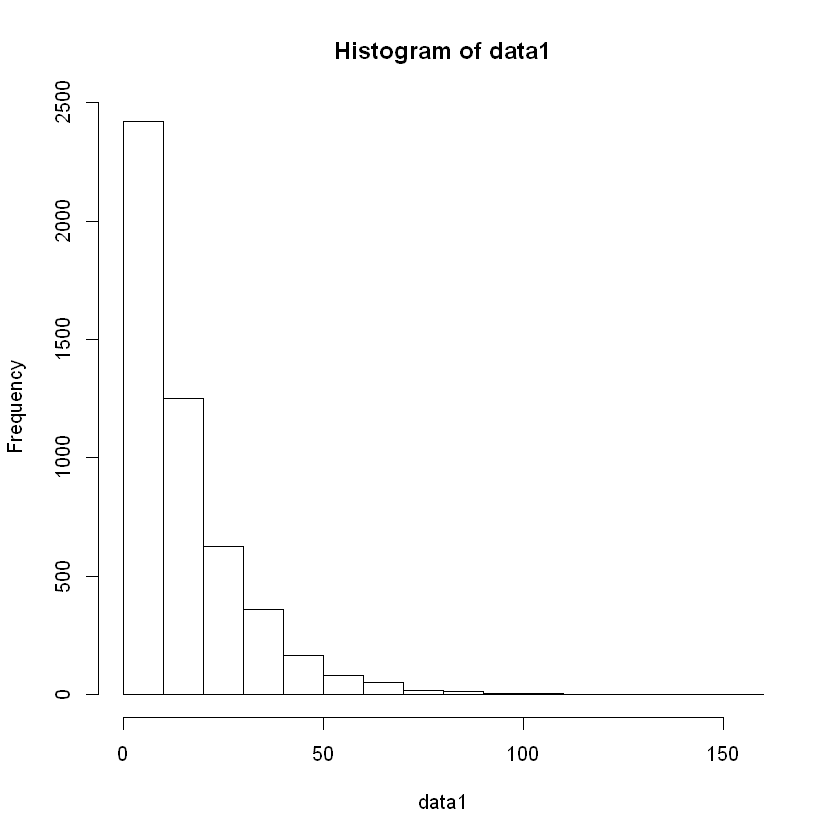

In [1]:
setwd("C:/Users/Honza/Desktop/ecoxhw1/ecox1")
data1 <- get(load("problem_1_dataset.Rdata"))
head(data1)
summary(data1)
hist(data1)

# d)

We want to obtain maximum likelihood estimates of $\alpha$ and $\beta$, and estimate the asymptotic covariance matrix for the estimates. We begin by computing estimates of $\alpha$ and $\beta$:




In [17]:
library('maxLik') #load necessary packages
library('lmtest')

n <- length(data1) #number of observations

logLikFun <- function(param){
    if (param[1] <= 0 | param[2] <= 0) return(NA) #alpha and beta must be qreater than zero
    return(n* log(param[1]*param[2]) + (param[2]-1)*sum(log(data1)) - param[1]*sum(data1^param[2])) #log-likelihood function
}

gradLik <- function(param){
    if (param[1] <= 0 | param[2] <= 0) return(NA) #alpha and beta must be qreater than zero
    alpha <- param[1]
    beta <- param[2]
    g <- numeric(2)
    g[1] <- n/alpha - sum(data1^beta)
    g[2] <- cbind(n/beta + sum(log(data1)) - alpha*sum(data1^beta * log(data1)))
    return(t(g))
}

hessian <- function(param){
    if (param[1] <= 0 | param[2] <= 0) return(NA) #alpha and beta must be qreater than zero
    alpha <- param[1]
    beta <- param[2]
    row1col1 <- ((-n)/alpha**2)
    row2col1 <- -sum(log(data1)*data1^beta)
    row1col2 <- -sum(log(data1)*data1^beta)
    row2col2 <- ((-n)/(beta^2)) - alpha*sum((log(data1)^2)*(data1^beta))
    hessian_matrix <- matrix(c(row1col1,row2col1,row1col2,row2col2), nrow = 2, ncol = 2)
    return(hessian_matrix)
}
                                              
# When I use gradient and hessian as inputs, my results are different (in bad way).
#What is defined wrong in gradLik and hessian?
mle <- maxLik(logLik = logLikFun, 
              grad = gradLik,
              hess = hessian,
              start = c(alpha = 0.04, beta = 1.05))
summary(mle)
#print(paste("alpha = " coef))

alpha <- coef(mle)[1]
beta <- coef(mle)[2]

round(alpha,5)
round(beta,5)

    

vcov(mle)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 5 iterations
Return code 2: successive function values within tolerance limit
Log-Likelihood: -18605.46 
2  free parameters
Estimates:
      Estimate Std. error t value Pr(> t)    
alpha 0.062975   0.002381   26.45  <2e-16 ***
beta  1.013935   0.011147   90.96  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
--------------------------------------------

alpha 
0.06297

beta 
1.01394

,alpha,beta
alpha,5.669411e-06,-2.461425e-05
beta,-2.461425e-05,1.242473e-04


Now that we have obtained estimates of $\alpha$ and $\beta$ we can compute covariance matrix for our estimates:

In [166]:
alpha <- coef(mle)[1]
beta <- coef(mle)[2]
row1col1 <- ((-n)/alpha**2)
row2col1 <- -sum((data1**beta)*log(data1))
row1col2 <- -sum((data1^beta)*log(data1))
row2col2 <- (-n)/(beta^2) - alpha * sum((data1^beta)*log(data1))
hessian_matrix <- matrix(c(row1col1,row2col1,row1col2,row2col2), nrow = 2, ncol = 2)
print(hessian_matrix)

           [,1]       [,2]
[1,] -1260782.8 -249769.79
[2,]  -249769.8  -20592.64


In [167]:
fisher_information_matrix <- -hessian_matrix
covariance_matrix <- fisher_information_matrix^(-1)
print(covariance_matrix)
#Covariance matrix from inputting straight into formula - which covariance matrix is the right one?

             [,1]         [,2]
[1,] 7.931580e-07 4.003687e-06
[2,] 4.003687e-06 4.856104e-05


# e)

We want to obtain maximum likelihood estimate of $\alpha$ under the hypothesis that $\beta=1$.

In [136]:
'''
logLikFun2 <- function(param){
    param[2] <- 1
    if (param[1] <= 0 | param[2] <= 0) return(NA) #alpha and beta must be qreater than zero
    return(n* log(param[1]*param[2]) + (param[2]-1)*sum(log(data1)) - param[1]*sum(data1^param[2])) #log-likelihood function
}

mle2 <- maxLik(logLikFun2, start = c(alpha = 2, beta = 1))
summary(mle2)
'''
#Why is this not working?
'''
    just checking if I understand stuff from Statistics
    weibull <- function(alpha, beta, vector){
    funkce <- alpha * beta * vector^(beta-1) * 2.7**(-alpha * vector**beta)
    return(funkce)
    }
    newdata <- weibull(alpha,beta,data1)
    plot(data1,newdata)
    '''

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected string constant
9: summary(mle2)
10: '
      ^


In [19]:
#We set beta to be equal to one

logLikFun2 <- function(param){
    if (param[1] <= 0) return(NA) #alpha and beta must be qreater than zero
    return(n* log(param[1]) + (-1)*sum(log(data1)) - param[1]*sum(data1)) #log-likelihood function
}

gradLik2 <- function(param){
    if (param[1] <= 0) return(NA) #alpha and beta must be qreater than zero
    alpha <- param[1]
    g <- numeric(1)
    g[1] <- n/alpha - sum(data1)
    return(t(g))
}

hessian2 <- function(param){
    if (param[1] <= 0) return(NA) #alpha and beta must be qreater than zero
    alpha <- param[1]
    row1col1 <- ((-n)/alpha**2)
    hessian_matrix <- matrix(c(row1col1), nrow = 1, ncol = 1)
    return(hessian_matrix)
}

mle2 <- maxLik(logLik = logLikFun2, 
              grad = gradLik2,
              hess = hessian2,
              start = c(alpha = 0.04))

summary(mle2)
round(coef(mle2)[1],5)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 5 iterations
Return code 1: gradient close to zero
Log-Likelihood: -29404.1 
1  free parameters
Estimates:
       Estimate Std. error t value Pr(> t)    
alpha 0.0657925  0.0009304   70.71  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
--------------------------------------------

alpha 
0.06579

# f)

We will carry out Wald test with $H_0:$ $\beta=1$

In [20]:
# wald test
waldtest(mle, mle2)

coefs <- summary(mle2)$coefficients[2,]
wald_stat <- (coefs[1]/coefs[2])^2 # (estimate/se)^2
# p-value by hand
pchisq(wald_stat, 1, lower.tail=F)

Res.Df,Df,Chisq,Pr(>Chisq)
-2,NA,NA,NA
-1,-1,8274.339,0


numeric(0)

In [ ]:
# a tady uz nevim. Abych to prevedl na OLS, musel bych pracovat s normalnim rozdelenim, a tohle neni normalni.

# g)

We will carry out likelihood ratio test with $H_0$ : $\beta = 1$

In [ ]:
# using log likelihood to calculate LR:
lrstat <- 2*(logLik(mle1) - logLik(mle2))
# getting p-value 
pchisq(lrstat, df = 1, lower.tail = F)

# h)

We will carry out Lagrange multiplier test with $H_0$ : $\beta = 1$

# Problem 2

In [29]:
data2 <- get(load("problem_2_dataset.Rdata"))
library(dplyr) #package needed in order to use select() function
data2 <- select(data2,  lhhexp1, lhhex12m, farm, urban98, age, sex) #we sill subset the data to variables of interest only
head(data2) #let's check the data

lhhexp1,lhhex12m,farm,urban98,age,sex
10.13649,11.233212,non farm,Urban,68,2
10.25206,8.505120,non farm,Urban,57,2
10.93231,8.713418,non farm,Urban,42,1
10.26749,9.291736,non farm,Urban,72,2
10.48811,7.555382,non farm,Urban,73,2
10.52660,9.789702,non farm,Urban,66,2


# a)

We will start by describing the data statistically and by making some descriptive plots:

In [33]:
summary(data2) # basic information about our variables

    lhhexp1          lhhex12m            farm       urban98          age       
 Min.   : 6.543   Min.   : 0.000   non farm:2561   Rural:4269   Min.   :16.00  
 1st Qu.: 8.920   1st Qu.: 5.273   farm    :3438   Urban:1730   1st Qu.:37.00  
 Median : 9.311   Median : 6.372                                Median :46.00  
 Mean   : 9.342   Mean   : 6.311                                Mean   :48.01  
 3rd Qu.: 9.759   3rd Qu.: 7.392                                3rd Qu.:58.00  
 Max.   :12.202   Max.   :12.363                                Max.   :95.00  
                  NA's   :993                                                  
      sex       
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.271  
 3rd Qu.:2.000  
 Max.   :2.000  
                

[1] "numeric"
[1] "numeric"
[1] "factor"
[1] "factor"
[1] "integer"
[1] "factor"


[1] "factor"

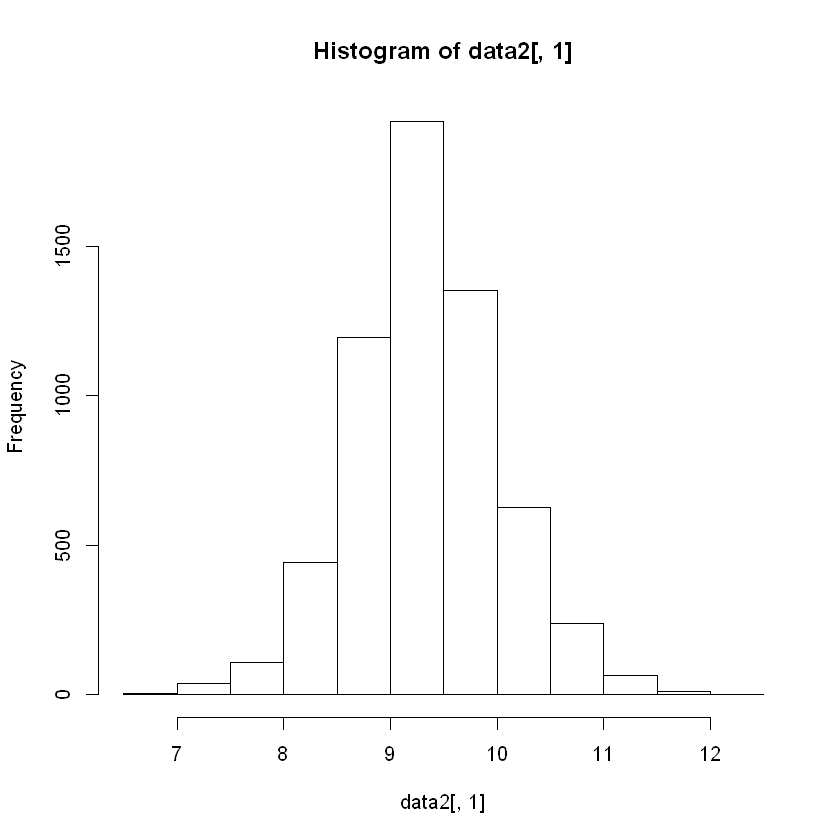

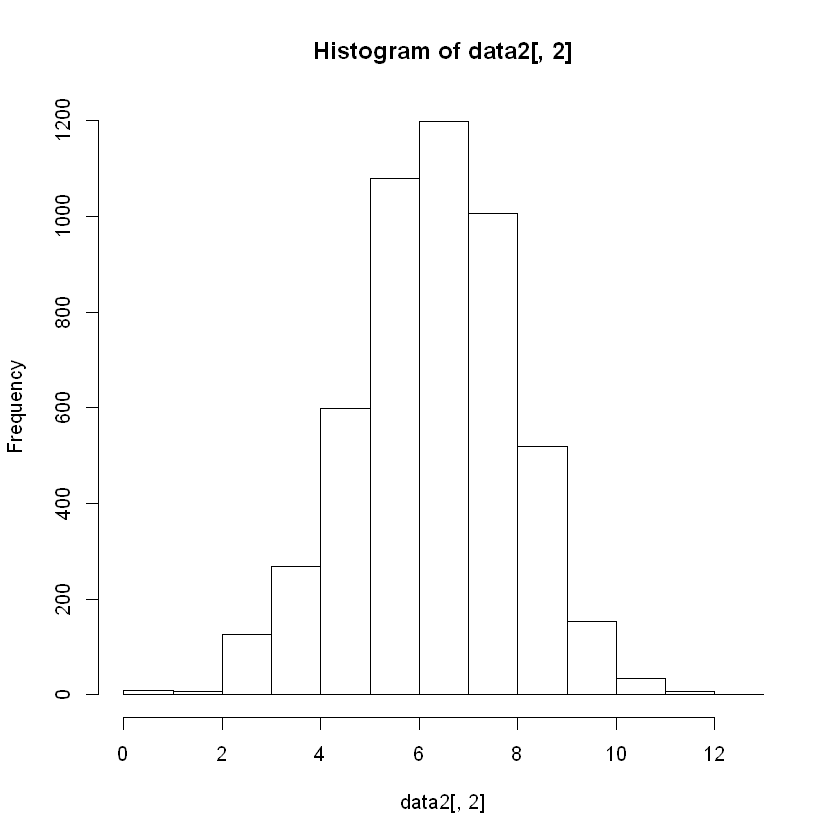

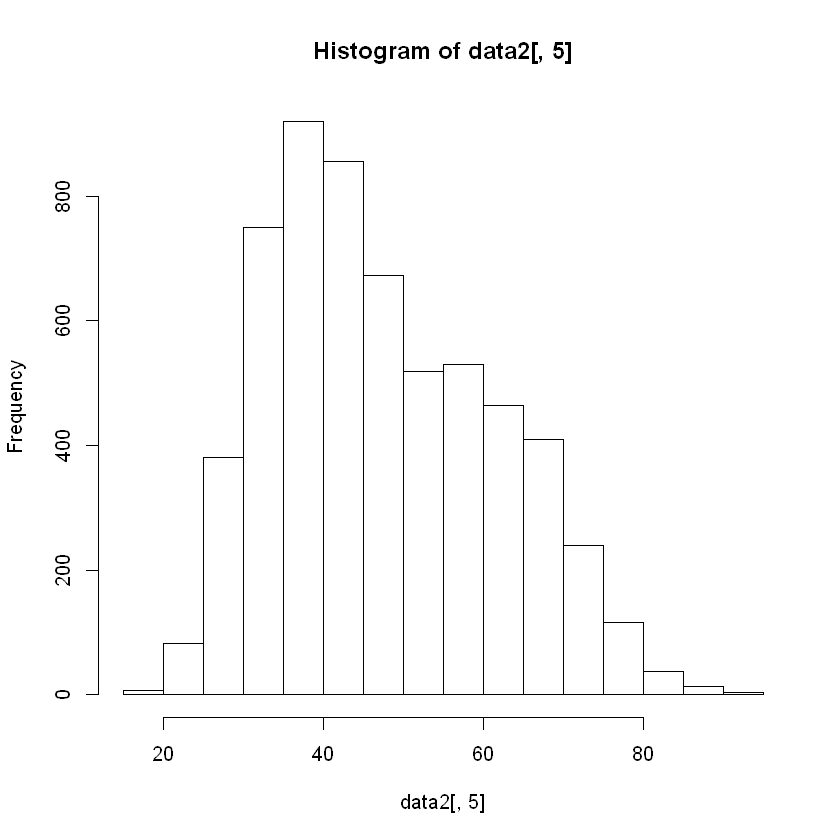

In [66]:
#data2$lhhexp1 <- numeric(data2$lhexp1)
for (i in 1:ncol(data2)){
    print(class(data2[,i]))
}
data2$sex <- factor(data2$sex)
class(data2$sex)
hist(data2[,1])
hist(data2[,2])
hist(data2[,5])